In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
from scipy.stats import binom
import sys as sys

In [ ]:
i = 2**32
print(i,sys.getsizeof(i))
x = 0.5
print(x,sys.getsizeof(x))


4294967296 32
0.5 24


31 15 16.0 1.144464448094368


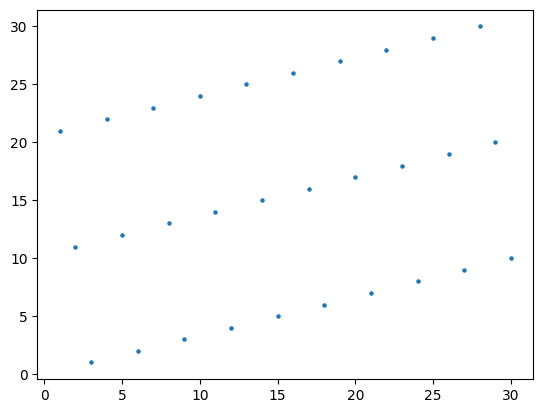

In [ ]:
# three conditions below yield full period m
m = 31 # 2^n, works well for m with many repeated prime factors
a = 3     # a-1 divisible by m prime factors & 4 if m divisible by 4
c = 0     # m, c are coprimes

xi = np.zeros(m-1)   # initial seed in range 0 to m-1
index = np.linspace(0,m,m-1)

xi[0] = 7
for i in range(1,m-1):
  xi[i] = ( a * xi[i-1] + c ) % m

xishift = np.concatenate((xi[-1:], xi[:-1])) # -1 accesses last element

#plt.scatter(index,xi, s=5). # distribution plot

plt.scatter(xi,xishift, s=5) # spectral plot

runs = 0
for i in range(1, m-1):
    if xi[i] > xi[i - 1]:
       runs += 1

p = 0.5  # Expected probability of an increase (for random data)
expected_runs = 1 + 2 * (m - 1) * p * (1 - p)
z = (runs - expected_runs) / np.sqrt(2 * m * p * (1 - p))
p_value = 2 * (1 - binom.cdf(runs - 1, m - 1, p))
print (m,runs,expected_runs,p_value)